In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive
root = '/gdrive/My Drive/Wtech/6/'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Mounted at /gdrive
/gdrive


In [ ]:
train_set = pd.read_csv(root+"states_all.csv")

Bu ödevde [ABD Eğitim Sistemi](https://www.kaggle.com/noriuk/us-education-datasets-unification-project/home)'ne ait verileri inceleyemeye devam edeceksiniz. Bu veri kümesinde eyalet bazında yıllık bir çok veri bulunmaktadır. Bu verilerin açıklamalarına yine Kaggle'dan ulaşabilirsiniz. 

Bu ödevi tamamlamak için, aşağıdaki soruların çözümlerini içeren Jupyter notebook dosyasının Github linkini gönderin. Kafanıza takılan konuları mentörünüzle konuşabilir ya da ofis saatinde Slack üzerinden sorabilirsiniz.

Öncelikle bir önceki derste uyguladağınız eksik değerleri tamamlama tekniklerinden en uygun olanını uygulayın. Aşağıdaki sorulara cevap verebilmeniz için eksik verilerin üstesinden gelmelisiniz.

1. Tek değişkenli analiz yaparak verileri yorumlayın, önemli gördüğünüz noktaları belirtin.

2. Bir eyaleti ele alın (ör: California) ve toplam gelirleri ile toplam harcamalarının yıllara göre değişiminin  doğru grafiğini çizin. Bu iki değişken yıllara göre değişim göstermekte midir? Zirve ve dip yaptığı yıllar var mı?

3. Seçtiğiniz eyalette, öğrenciler hangi derste daha başarılı? Matematik mi yoksa okuma mı?

4. Matematik ve okuma notlarının dağılımı nedir?

5. Metematik ve okuma notlarında birçok eksik değer olduğunu farketmişsinizdir. Eksik değerleri ortalama, medyan ve enterpolasyon ile tamamlayın. Bu tekniklerin notların dağılımı üzerindeki etkisini karşılaştırın.

In [ ]:
train_set_2 = train_set.fillna(train_set.mean())

1. Tek değişkenli analiz yaparak verileri yorumlayın, önemli gördüğünüz noktaları belirtin.

In [ ]:
train_set_2.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,1715.000000,1.715000e+03,1.715000e+03,1.715000e+03,1.715000e+03,1.715000e+03,1.715000e+03,1.715000e+03,1.715000e+03,1.715000e+03,1.715000e+03,1715.000000,1715.000000,1715.000000,1715.000000,1715.000000,1.715000e+03,1.715000e+03,1.715000e+03,1715.000000,1715.000000,1715.000000,1715.000000
mean,2002.075219,9.175416e+05,9.102045e+06,7.677799e+05,4.223743e+06,4.110522e+06,9.206242e+06,4.768010e+06,2.682587e+06,4.299509e+05,9.034675e+05,17840.958495,68810.962010,69166.507966,68106.537377,58420.870711,5.779547e+05,2.820691e+05,9.139695e+05,236.327434,278.280731,218.806154,263.558719
std,9.568621,9.008956e+05,1.013847e+07,9.888707e+05,4.784665e+06,4.732787e+06,1.033950e+07,5.431992e+06,2.894399e+06,4.517421e+05,1.146196e+06,28461.478658,78693.559497,77997.995523,76054.685450,65785.422981,5.210620e+05,2.612965e+05,1.030010e+06,5.326473,6.124894,4.726942,3.783105
min,1986.000000,4.386600e+04,4.656500e+05,3.102000e+04,0.000000e+00,2.209300e+04,4.816650e+05,2.655490e+05,1.399630e+05,1.154100e+04,1.270800e+04,96.000000,5122.000000,4577.000000,3371.000000,2572.000000,3.769800e+04,1.353000e+04,6.844900e+04,192.000000,231.000000,179.000000,236.000000
25%,1994.000000,4.646880e+05,2.992297e+06,2.602770e+05,1.618602e+06,1.162580e+06,3.004448e+06,1.570157e+06,8.996910e+05,1.624780e+05,2.608130e+05,2536.500000,20944.000000,20486.500000,20518.500000,17949.000000,3.158105e+05,1.457900e+05,2.800010e+05,236.327434,278.280731,218.806154,263.558719
50%,2002.000000,9.175416e+05,8.363904e+06,6.890720e+05,3.920971e+06,3.566484e+06,8.488521e+06,4.224716e+06,2.503616e+06,4.299509e+05,8.285300e+05,10310.000000,51920.000000,51999.000000,50447.000000,40774.000000,5.779547e+05,2.820691e+05,6.809780e+05,236.327434,278.280731,218.806154,263.558719
75%,2010.000000,9.175416e+05,9.102045e+06,7.677799e+05,4.223743e+06,4.110522e+06,9.206242e+06,4.768010e+06,2.682587e+06,4.299509e+05,9.034675e+05,19689.000000,75726.000000,77052.000000,76719.500000,68023.000000,5.779547e+05,2.820691e+05,1.002840e+06,236.327434,278.280731,218.806154,263.558719
max,2019.000000,6.307022e+06,8.921726e+07,9.990221e+06,5.090457e+07,3.610526e+07,8.532013e+07,4.396452e+07,2.605802e+07,3.995951e+06,1.022366e+07,256222.000000,535379.000000,493415.000000,500143.000000,498403.000000,3.929869e+06,2.013687e+06,6.441557e+06,253.000000,301.000000,237.000000,280.000000


2. Bir eyaleti ele alın (ör: California) ve toplam gelirleri ile toplam harcamalarının yıllara göre değişiminin doğru grafiğini çizin. Bu iki değişken yıllara göre değişim göstermekte midir? Zirve ve dip yaptığı yıllar var mı?

In [ ]:
california = train_set_2.loc[train_set_2['STATE'] == "CALIFORNIA"].sort_values("YEAR")

In [ ]:
california

In [ ]:
plt.plot(california.YEAR, california.TOTAL_REVENUE, c = "y", marker = ".", markersize = 5, linestyle = "-", linewidth = 3)
plt.plot(california.YEAR, california.TOTAL_EXPENDITURE, c = "R", marker = ".", markersize = 5, linestyle = "-", linewidth = 3)

Yıllara göre benzer hareket etmektedir. Yıl geçtikçe artmaktadırlar. Eksik veriler yüzünden hatalı çizim bulunuyor.

3. Seçtiğiniz eyalette, öğrenciler hangi derste daha başarılı? Matematik mi yoksa okuma mı?

In [ ]:
california.AVG_MATH_4_SCORE.mean()
california.AVG_READING_4_SCORE.mean()

MATH skoru daha yüksektir.

4. Matematik ve okuma notlarının dağılımı nedir?

(array([ 1.,  0.,  2.,  0.,  3.,  2.,  1.,  2.,  2., 20.]),
 array([197.        , 199.18061538, 201.36123077, 203.54184615,
        205.72246154, 207.90307692, 210.08369231, 212.26430769,
        214.44492308, 216.62553846, 218.80615385]),
 <a list of 10 Patch objects>)

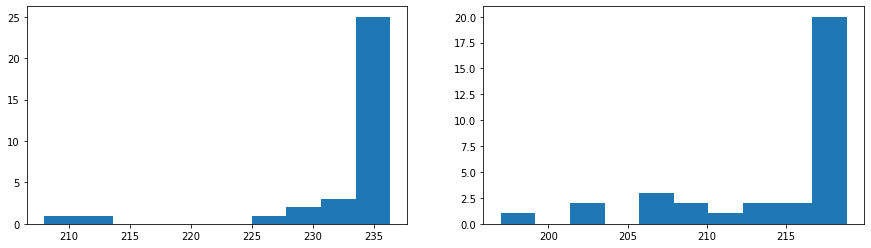

In [ ]:
fig = plt.figure(figsize=(15, 4))
plt.subplot(1, 2, 1)
plt.hist(california["AVG_MATH_4_SCORE"])
plt.subplot(1, 2, 2)
plt.hist(california["AVG_READING_4_SCORE"])